# TITLE: **Food Delivery Time Prediction and Analysis**

In [1]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from geopy.distance import geodesic


### Data Acquisition


---

In [2]:
# Importing Dataset

master_df = pd.read_csv('Food_Delivery_Dataset.csv')
master_df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


#### **Understanding and describing the data**
---

In [3]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          45593 non-null  object 
 4   Delivery_person_Ratings      45593 non-null  object 
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Weatherconditions            45593 non-null  object 
 11  Road_traffic_density         45593 non-null  object 
 12  Vehicle_condition            45593 non-null  int64  
 13  Type_of_order   

---
##### We have **19 columns** and **45,593 rows** in the original dataset.

##### Describing columns that are not obviously named:


> **ID:** Order ID.


> **Vehicle_condition:** 0 means very good, 3 means very bad.


> **Type_of_order:** Snack, Drinks, Buffet or Meal.

> **multiple_deliveries:** How many deliveries have to be made in one trip.
---










In [4]:
# Checking for null values in the unmodified dataset

master_df.isna().sum()

Unnamed: 0                     0
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

---
##### We see that all rows and columns are filled in the unmodified dataset.
##### But there might still exist null values in wrong formats.
---

## Data Pre-Processing
---
### Data Cleaning

In [5]:
# Finding all types of null values, storing in set null_types

master_df = master_df.astype(str) # converting dataframe to string

null_types = set()

for column in master_df.columns:
  unique_vals = master_df[column].unique()
  for val in unique_vals:
    if 'nan' in val.lower():
      null_types.add(val)

print(null_types)

{'conditions NaN', 'NaN '}


In [6]:
# Correcting null values to np.nan

for na_value in null_types:
  master_df.replace(na_value, np.nan, inplace = True)

In [7]:
# Counting null values again

master_df.isna().sum()

Unnamed: 0                        0
ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [8]:
# removing whitespaces from either sides

master_df = master_df.apply(lambda x: x.str.strip())
master_df.drop(columns= master_df.columns[0], inplace = True)

In [9]:
# Data imputation using KNN-Imputer
"""
from sklearn.impute import KNNImputer

imputer = KNNImputer()
master_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]
master_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"""

"\nfrom sklearn.impute import KNNImputer\n\nimputer = KNNImputer()\nmaster_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]\nmaster_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"

In [10]:
# Dropping rows containing null values

master_df.dropna(inplace = True)

### Data Wrangling
---

In [11]:
master_df['Weatherconditions'] = master_df['Weatherconditions'].str.split(" ", expand=True)[1]

master_df['Time_taken(min)'] = master_df['Time_taken(min)'].str.split(" ", expand=True)[1]

In [12]:
# Converting columns to correct data-type

num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
            'Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition',
            'multiple_deliveries','Time_taken(min)']

## Converting numerical columns to float
for col in num_cols:
    master_df[col] = master_df[col].astype('float64')
    
## Converting Order_Date column to datetime date format
master_df['Order_Date'] = pd.to_datetime(master_df['Order_Date'], format = "%d-%m-%Y")

In [13]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lab = le.fit_transform(master_df['Delivery_person_ID'])

In [14]:
# one hot encoding
encoded_df = master_df.copy()

encoded_df = pd.get_dummies(encoded_df ,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                                  'Type_of_vehicle', 'City'])
encoded_df = pd.get_dummies(encoded_df ,columns = ['Festival'], drop_first=True)

### Adding useful features
---

In [15]:
# Computing distance from restaurant to delivery location using lat and long and making a new column named 'distance_km'

# creating new column filled with zeroes
master_df['distance_km'] = np.zeros(master_df.shape[0])

restaurant_cordinates = master_df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates = master_df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

# calculating and filling in distance
for i in range(master_df.shape[0]):
    master_df['distance_km'].loc[i] = geodesic(restaurant_cordinates[i], delivery_location_cordinates[i]).km

# Dropping lat long columns
master_df = master_df.drop(columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'] )

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
# Cleaning column 'distance_km'

# Converting to string to remove ' km'
master_df['distance_km'] = master_df['distance_km'].astype(str).str[:-3].replace('',0)

# Converting to float and rounding off
master_df['distance_km'] = master_df['distance_km'].astype(float).round(2)

In [17]:
# We check for anomalous distance values

threshold_dist = 25
print(f"Number of deliveries with distance more than {threshold_dist} km =",
      master_df[master_df['distance_km'] > 25]['distance_km'].count())

print(f"Number of deliveries with distance 0 =",
      master_df[master_df['distance_km'] == 0]['distance_km'].count())

Number of deliveries with distance more than 25 km = 131
Number of deliveries with distance 0 = 3835


In [18]:
# Dropping entries with distance equal to 0 or more than 25

# index of rows that have distance equal to 0 or greater than 25 km
index_to_drop = master_df[(master_df['distance_km'] == 0) | (master_df['distance_km'] > 25)].index

master_df.drop(index_to_drop, inplace = True)

In [19]:
# Adding column for avg_speed

master_df['avg_speed_kmph'] = round(master_df['distance_km']*60 / master_df['Time_taken(min)'])

# Exploratory Data Analysis
---

In [20]:
# Doing EDA on a copy of the master dataframe

edal_df = master_df.copy()

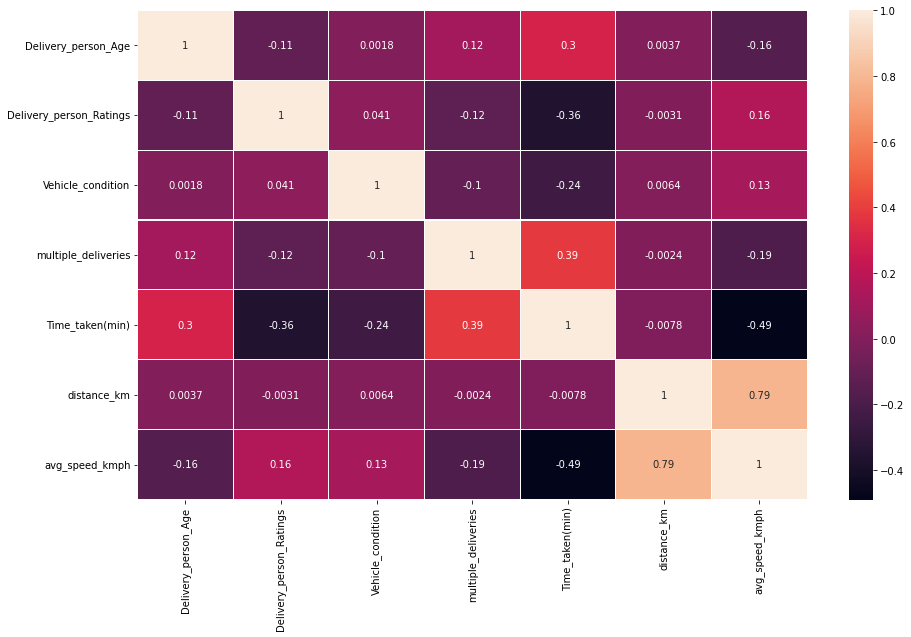

In [21]:
# Correlation HeatMap

plt.figure(figsize=(15,9))

sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)
plt.show()

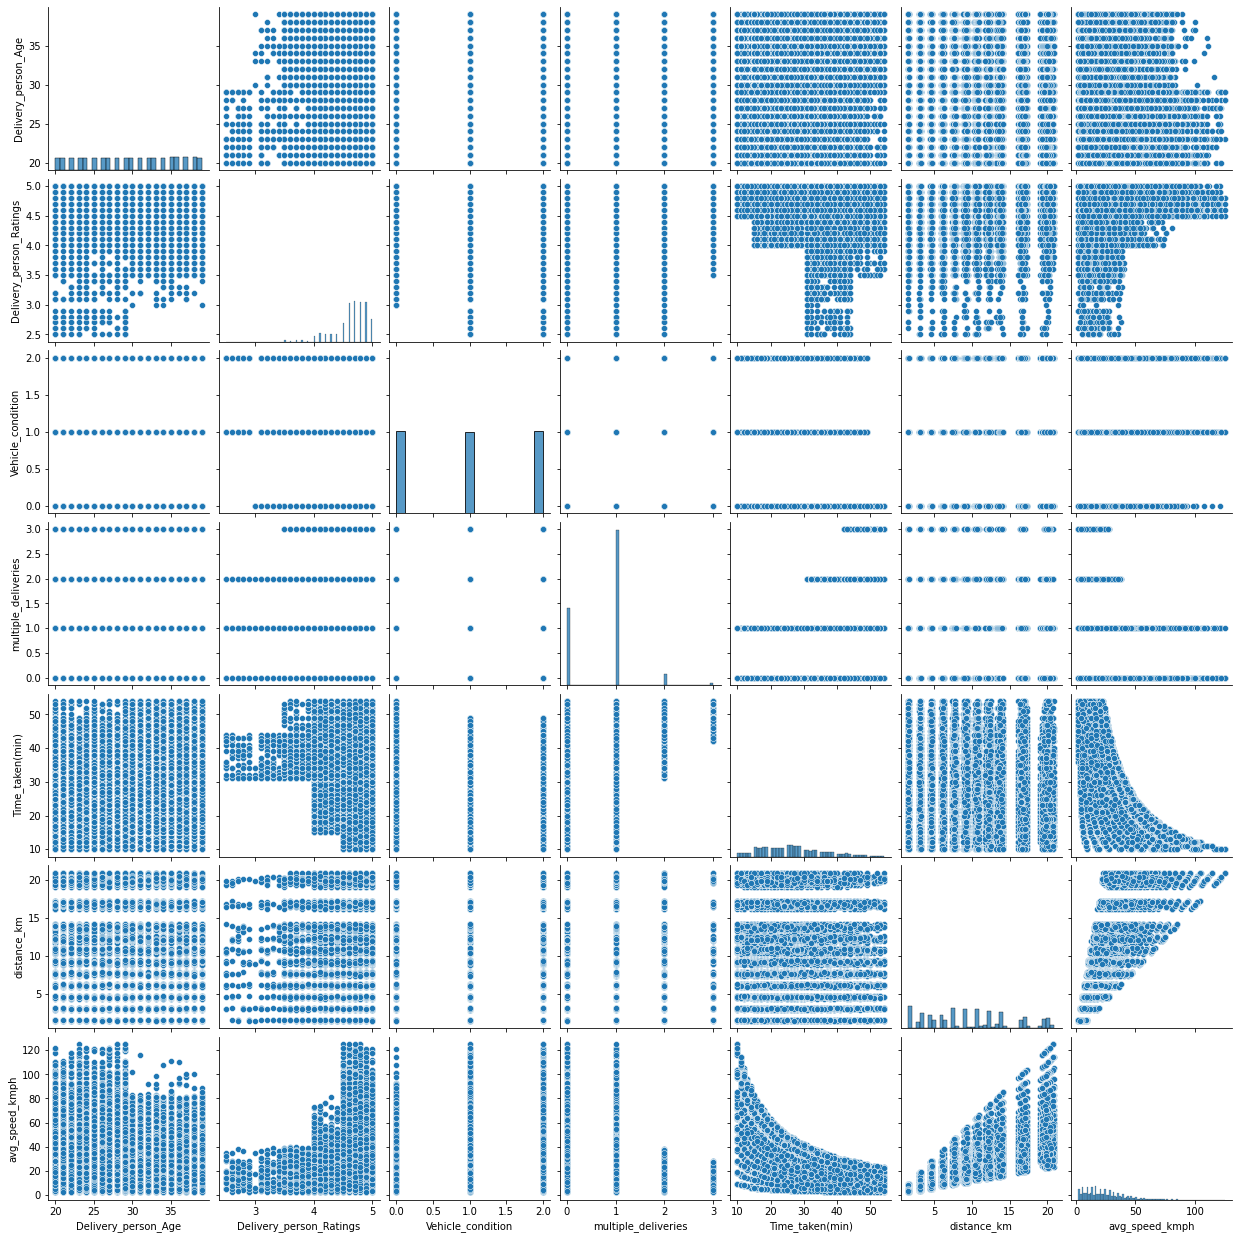

In [22]:
# Pair Plots

sns.pairplot(edal_df)

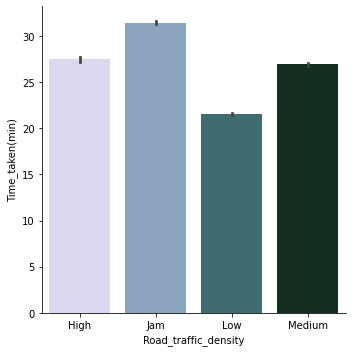

In [23]:
sns.catplot(x="Road_traffic_density", 
            y="Time_taken(min)",
            kind="bar",
            palette="ch:5", 
            data=edal_df)

In [24]:
# Age v/s Delivery Time (Weatherwise)

fig=px.line(edal_df.sort_values(by='Delivery_person_Age'),
            x='Delivery_person_Age',
            y='Time_taken(min)',
            animation_frame='Weatherconditions',
            animation_group='Delivery_person_Age',
            color='Weatherconditions',
            markers=True,
            template='plotly_dark',
            title='<b>Driver Age vs Delivery Time (Weatherwise)')

fig.update_traces(showlegend=False)

In [25]:
# Difference between average speeds of under 30 and over 30 drivers

under_30 = edal_df[ edal_df['Delivery_person_Age'] < 30]['avg_speed_kmph'].mean()
above_30 = edal_df[ edal_df['Delivery_person_Age'] >= 30]['avg_speed_kmph'].mean()

print(f'Average speed of persons under 30: {round(under_30,2)} kmph')
print(f'Average speed of persons above 30: {round(above_30,2)} kmph')

Average speed of persons under 30: 28.79 kmph
Average speed of persons above 30: 21.7 kmph


## Insight 2: The average delivery speed of delivery persons under the age of 30 is about 25% more than of those above the age of 30

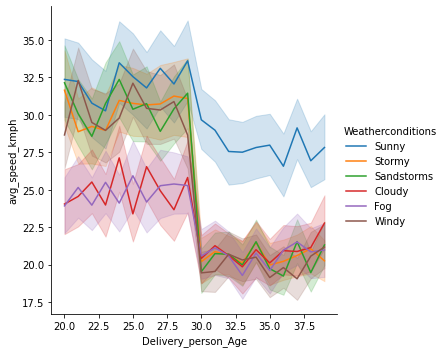

In [26]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Weatherconditions',kind = 'line')

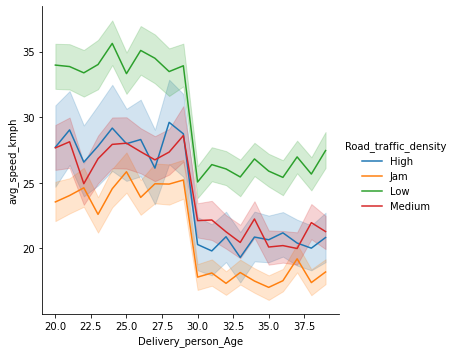

In [27]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

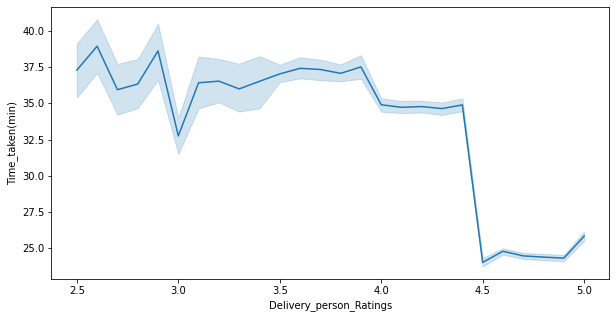

In [28]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="Time_taken(min)", data=edal_df)
plt.show()

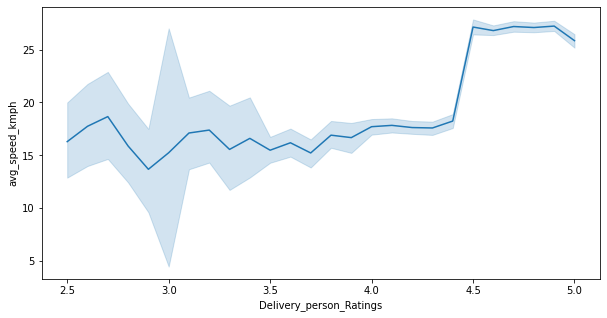

In [29]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="avg_speed_kmph", data=edal_df)
plt.show()

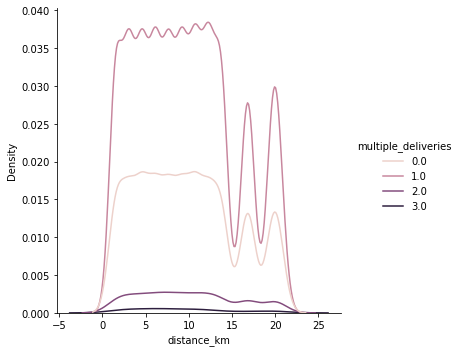

In [30]:
sns.displot(hue='multiple_deliveries',data=edal_df,kind='kde', x = 'distance_km')

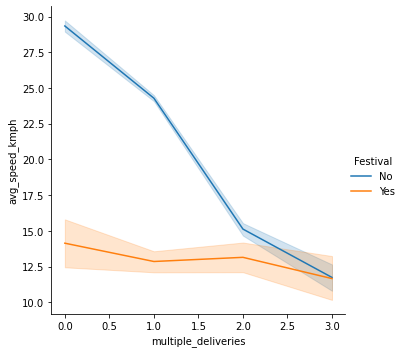

In [31]:
sns.relplot(data = edal_df, x = 'multiple_deliveries', y = 'avg_speed_kmph',hue='Festival',kind = 'line')

In [32]:
#  Sunny vs Storms vs Winds/Fog

edal_df[edal_df['Weatherconditions'] == 'Sunny']['avg_speed_kmph'].mean()

30.074092741935484

In [33]:
edal_storms = edal_df.loc[(edal_df['Weatherconditions'] == 'Stormy') | (edal_df['Weatherconditions'] == 'Sandstorms')]
print(edal_storms['Weatherconditions'].unique())
edal_storms['avg_speed_kmph'].mean()

['Stormy' 'Sandstorms']


25.351489497643957

In [34]:
edal_not_storms = edal_df.loc[(edal_df['Weatherconditions'] != 'Stormy') & (edal_df['Weatherconditions'] != 'Sandstorms')
                                 & (edal_df['Weatherconditions'] != 'Sunny')]
print(edal_not_storms['Weatherconditions'].unique())
edal_not_storms['avg_speed_kmph'].mean() 

['Cloudy' 'Fog' 'Windy']


23.51201859580538

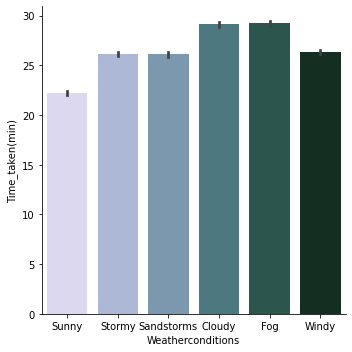

In [35]:
# Catplot: Delivery Time v/s Weather Conditions

sns.catplot(data=edal_df, x="Weatherconditions", y="Time_taken(min)", kind="bar", palette="ch: 5",)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



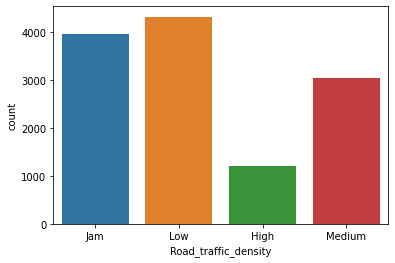

In [36]:
sns.countplot(edal_storms['Road_traffic_density'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



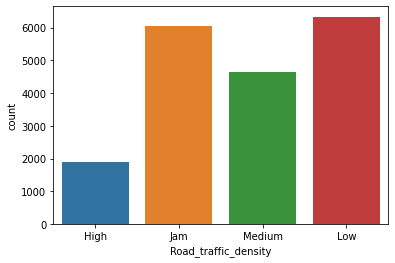

In [37]:
sns.countplot(edal_not_storms['Road_traffic_density'])
plt.show()

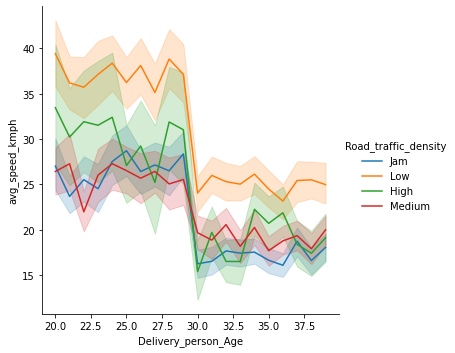

In [38]:
sns.relplot(data = edal_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

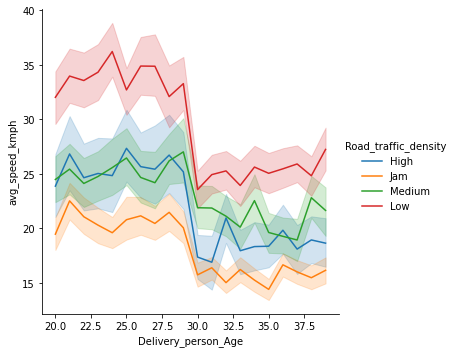

In [39]:
sns.relplot(data = edal_not_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

# PDSL
---

In [40]:
pdsl_df = master_df.copy()
pdsl_df = pdsl_df.drop(columns = ['ID', 'Delivery_person_ID','Order_Date'] )
pdsl_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,avg_speed_kmph
0,37.0,4.9,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.02,8.0
1,34.0,4.5,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.14,37.0
2,23.0,4.4,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.55,4.0
3,38.0,4.7,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.77,22.0
4,32.0,4.6,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.20,12.0


In [41]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Time_taken(min)']
for col in num_cols:
    pdsl_df[col]=pdsl_df[col].astype('float64')

In [42]:
# 0 -- bad, 1 - good, 2-better, 3-best -- vehicle condition

In [43]:
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                          'Type_of_vehicle', 'City'])
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Festival'], drop_first=True)

In [44]:
features = pdsl_df.drop('Time_taken(min)', axis =1)
label = pdsl_df['Time_taken(min)'].copy()

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [46]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(26181, 27) (11221, 27) (26181,) (11221,)


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt



model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

models = {'Linear Regression':model_lr, 'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr, 
          'Decision Tree Regressor': model_dtr}

for i in models.keys():
  print(i)
  models[i].fit(x_train, y_train)
  y_pred = models[i].predict(x_test)
  print("Accuracy in training dataset: ", (models[i].score(x_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(x_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  75.80354900679541
Accuracy in testing dataset:  75.50097200868403
RMSE value:  4.598228302529669
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.63864621943429
Accuracy in testing dataset:  97.53167794911147
RMSE value:  1.4595434046895595
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  93.92322717447816
Accuracy in testing dataset:  93.64231385638568
RMSE value:  2.342424736004969
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.99995633967362
Accuracy in testing dataset:  95.05545136290941
RMSE value:  2.0657579361186533
--------------------------------------


In [48]:
#Hence the best model is Random Forest Regressor
# lowest rmse and highest acc on testing data
print('Random Forest Regression')
print("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))
print("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)
print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
y_pred=model_rf.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=pdsl_df.copy().merge(out,left_index=True,right_index=True)
out[['Delivery_person_Ratings','actual','predicted']].sample(10)

Random Forest Regression
Accuracy in training dataset:  99.63864621943429
Accuracy in testing dataset:  97.53167794911147
RMSE value:  2.0657579361186533


,Delivery_person_Ratings,actual,predicted
24994,4.7,19.0,18.49
29612,4.8,18.0,17.93
28022,4.6,22.0,22.02
1779,4.7,33.0,33.03
24924,5.0,30.0,29.23
9594,4.8,11.0,11.01
16445,4.2,35.0,34.17
24922,4.3,38.0,34.22
6310,4.6,21.0,21.02
39549,4.8,27.0,27.22


## abc
---

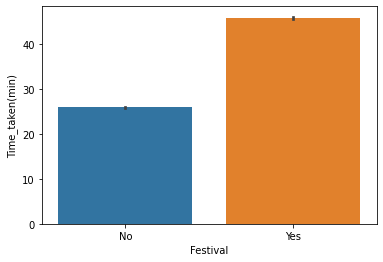

In [49]:
rating_4_plus = master_df[master_df['Delivery_person_Ratings'] >= 4]

sns.barplot(x = 'Festival', y = 'Time_taken(min)', data = rating_4_plus)

In [50]:
rating_4_plus[ rating_4_plus['Festival'] == 'Yes']['Time_taken(min)'].mean()

45.69565217391305

In [51]:
rating_4_plus[ rating_4_plus['Festival'] == 'No']['Time_taken(min)'].mean()

25.850828573840136

In [52]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>